# **CvDl2024_G Final Project MIGC Demo**

# **Install dependencies**

After this part, colab need to restart session then you can execute following part.

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!pip install transformers
!pip install torch
!pip install accelerate
!pip install flask
!pip install pyngrok
!pip install opencv-python
!pip install einops
!pip install diffusers==0.25.0
!pip install omegaconf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.1
    Uninstalling diffusers-0.32.1:
      Successfully uninstalled diffusers-0.32.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=3e12eacd88b53838d3d5216b189abc9e3f51bd5486e19132f87036818dd70d9a
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
!git clone https://github.com/limuloo/MIGC.git
%cd MIGC
!pip install -r requirement.txt

Cloning into 'MIGC'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 301 (delta 24), reused 30 (delta 14), pack-reused 258 (from 1)
Receiving objects: 100% (301/301), 34.19 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (136/136), done.
/content/MIGC
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 27.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.21.1-py3-none-any.whl size=1486610 sha256=c2731d3804eeec17cd0d47b8e45084079d87c82a10c770402ae8648256fe8ccb
  Stored in directory: /root/.cache/pip/wheels/a8/52/ec/901d7f3e1128bc56ea4365e9d3a157c1088e5450f4e8f7b202
Successfully built diffusers
  Attempting uninstall: huggingface_hub
    Found exist

In [ ]:
!pip uninstall peft
!pip install peft==0.13.0

Found existing installation: peft 0.14.0
Uninstalling peft-0.14.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/peft-0.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/peft/*
Proceed (Y/n)? y
  Successfully uninstalled peft-0.14.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 9.7 MB/s eta 0:00:00


In [ ]:
!pwd

/content/MIGC


In [ ]:
!pip install -e .

Obtaining file:///content/MIGC
  Preparing metadata (setup.py) ... done
  Running setup.py develop for MIGC


In [ ]:
!gdown --id 1v5ik-94qlfKuCx-Cv1EfEkxNBygtsz0T -O ./pretrained_weights/MIGC_SD14.ckpt
!gdown --id 1cmdif24erg3Pph3zIZaUoaSzqVEuEfYM -O ./migc_gui_weights/sd/cetusMix_Whalefall2.safetensors
!gdown --id 1Z_BFepTXMbe-cib7Lla5A224XXE1mBcS -O ./migc_gui_weights/clip/text_encoder/pytorch_model.bin

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1v5ik-94qlfKuCx-Cv1EfEkxNBygtsz0T
From (redirected): https://drive.google.com/uc?id=1v5ik-94qlfKuCx-Cv1EfEkxNBygtsz0T&confirm=t&uuid=e8de8b6a-5920-41eb-9f62-87e5ebd526a6
To: /content/MIGC/pretrained_weights/MIGC_SD14.ckpt
100% 230M/230M [00:06<00:00, 33.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1cmdif24erg3Pph3zIZaUoaSzqVEuEfYM
From (redirected): https://drive.google.com/uc?id=1cmdif24erg3Pph3zIZaUoaSzqVEuEfYM&confirm=t&uuid=4300bf78-c542-4c85-b12c-8bacc063489d
T

# **Construct StableDiffusionMIGCPipeline**

In [ ]:
import argparse
import numpy as np
import torch
import os
import yaml
import random
from diffusers.utils.import_utils import is_accelerate_available
from transformers import CLIPTextModel, CLIPTokenizer
from migc.migc_pipeline import StableDiffusionMIGCPipeline, MIGCProcessor, AttentionStore
from diffusers import EulerDiscreteScheduler
if is_accelerate_available():
    from accelerate import init_empty_weights
from contextlib import nullcontext

def offlinePipelineSetupWithSafeTensor(sd_safetensors_path):
    migc_ckpt_path = '/content/MIGC/pretrained_weights/MIGC_SD14.ckpt'
    clip_model_path = '/content/MIGC/migc_gui_weights/clip/text_encoder'
    clip_tokenizer_path = '/content/MIGC/migc_gui_weights/clip/tokenizer'
    original_config_file='/content/MIGC/migc_gui_weights/v1-inference.yaml'
    ctx = init_empty_weights if is_accelerate_available() else nullcontext
    with ctx():
        # text_encoder = CLIPTextModel(config)
        text_encoder = CLIPTextModel.from_pretrained(clip_model_path)
        tokenizer = CLIPTokenizer.from_pretrained(clip_tokenizer_path)
    pipe = StableDiffusionMIGCPipeline.from_single_file(sd_safetensors_path,
                                  original_config_file=original_config_file,
                                  text_encoder=text_encoder,
                                  tokenizer=tokenizer,
                                  load_safety_checker=False)
    print('Initializing pipeline')
    pipe.attention_store = AttentionStore()
    from migc.migc_utils import load_migc
    load_migc(pipe.unet , pipe.attention_store,
            migc_ckpt_path, attn_processor=MIGCProcessor)

    pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
    return pipe

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/content/MIGC/migc/migc_pipeline.py:117: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(batch_size == 2, "We currently only implement sampling with batch_size=1, \


In [ ]:
import os
%cd ..

print(os.getcwd())
print(os.path.exists('MIGC/migc_gui_weights/sd/cetusMix_Whalefall2.safetensors'))
print(os.listdir('MIGC/migc_gui_weights/sd/'))

/content
/content
True
['cetusMix_Whalefall2.safetensors', 'PUT_SD_SAFETENSORS_HERE']


In [ ]:
import yaml
from diffusers import EulerDiscreteScheduler
from migc.migc_utils import seed_everything
from migc.migc_pipeline import StableDiffusionMIGCPipeline, MIGCProcessor, AttentionStore
import os
from google.colab.patches import cv2_imshow, cv2

# migc_ckpt_path = 'pretrained_weights/MIGC_SD14.ckpt'
# assert os.path.isfile(migc_ckpt_path), "Please download the ckpt of migc and put it in the pretrained_weighrs/ folder!"


pipe = offlinePipelineSetupWithSafeTensor('MIGC/migc_gui_weights/sd/cetusMix_Whalefall2.safetensors')
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:2400: UserWarning: for text_model.embeddings.token_embedding.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:2400: UserWarning: for text_model.embeddings.position_embedding.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:2400: UserWarning: for text_model.encoder.layers.0.self_attn.k_proj.weight: copying from a non-m

Initializing pipeline


# **Generate Image**

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:430: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


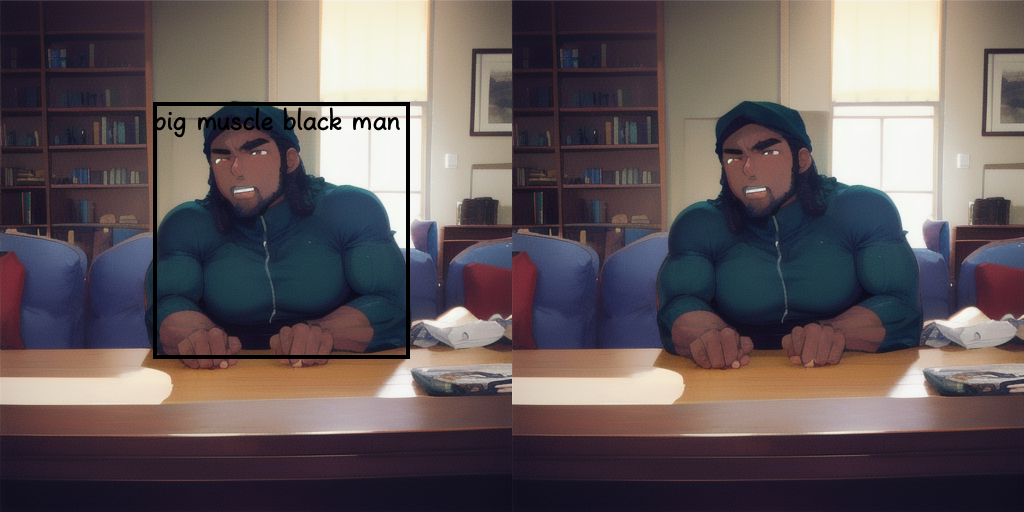

In [ ]:
prompt_final = [['masterpiece, best quality, blue colored sofa', 'big muscle black man']]

bboxes = [[[0.3, 0.2, 0.8, 0.7]]]

negative_prompt = 'worst quality, low quality, bad anatomy, watermark, text, blurry'
seed = 31452345
seed_everything(seed)

image = pipe(
    prompt_final,
    bboxes,
    num_inference_steps=20,
    guidance_scale=7.5,
    MIGCsteps=15,
    aug_phase_with_and=False,
    negative_prompt=negative_prompt,
    NaiveFuserSteps=30
).images[0]

image.save('output.png')
image.show()

image = pipe.draw_box_desc(image, bboxes[0], prompt_final[0][1:])
image.save('anno_output.png')
image.show()

img_anno = cv2.imread('./anno_output.png')
img = cv2.imread('./output.png')
cv2_imshow(np.concatenate([img_anno, img], axis=1))

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:430: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


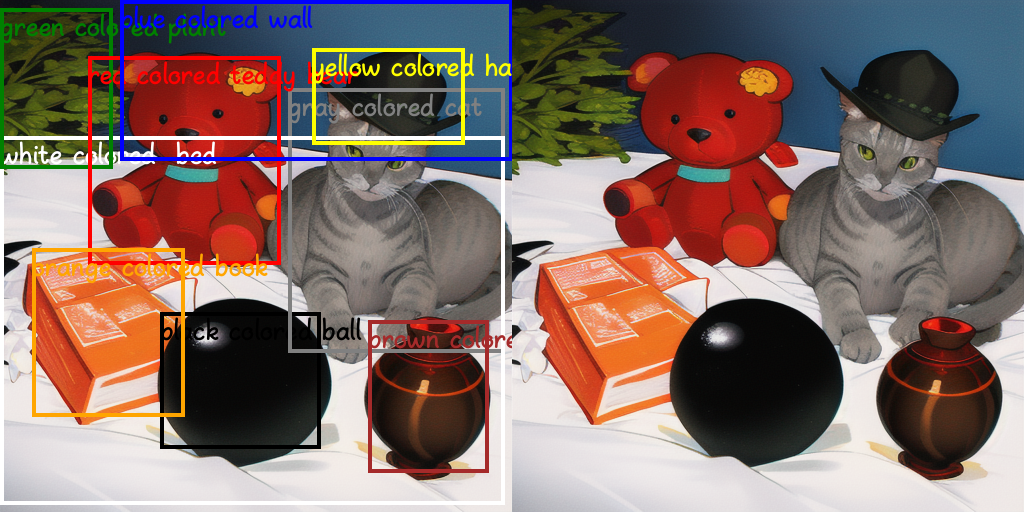

In [ ]:
prompt_final = [['masterpiece, best quality,black colored ball,gray colored cat,white colored  bed,\
                  green colored plant,red colored teddy bear,blue colored wall,brown colored vase,orange colored book,\
                  yellow colored hat', 'black colored ball', 'gray colored cat', 'white colored  bed', 'green colored plant', \
                    'red colored teddy bear', 'blue colored wall', 'brown colored vase', 'orange colored book', 'yellow colored hat']]
bboxes = [[[0.3125, 0.609375, 0.625, 0.875], [0.5625, 0.171875, 0.984375, 0.6875], \
            [0.0, 0.265625, 0.984375, 0.984375], [0.0, 0.015625, 0.21875, 0.328125], \
            [0.171875, 0.109375, 0.546875, 0.515625], [0.234375, 0.0, 1.0, 0.3125], \
                [0.71875, 0.625, 0.953125, 0.921875], [0.0625, 0.484375, 0.359375, 0.8125], \
                    [0.609375, 0.09375, 0.90625, 0.28125]]]
negative_prompt = 'worst quality, low quality, bad anatomy, watermark, text, blurry'
seed = 543255432
seed_everything(seed)
image = pipe(prompt_final, bboxes, num_inference_steps=20, guidance_scale=7.5,
                MIGCsteps=15, aug_phase_with_and=False, negative_prompt=negative_prompt, NaiveFuserSteps=30).images[0]
image.save('output1.png')
image.show()
image = pipe.draw_box_desc(image, bboxes[0], prompt_final[0][1:])
image.save('anno_output1.png')
image.show()


img_anno = cv2.imread('./anno_output1.png')
img = cv2.imread('./output1.png')
cv2_imshow(np.concatenate([img_anno, img], axis=1))


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:430: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


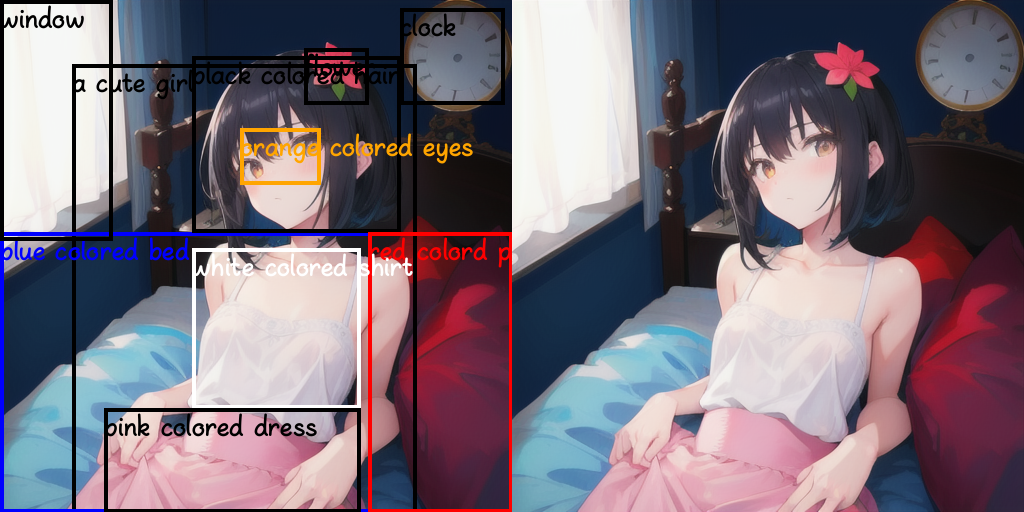

In [ ]:
prompt_final = [['4k, best quality, masterpiece, ultra high res, ultra detailed,a cute girl,blue colored bed,window,\
                clock,black colored hair,orange colored eyes,red colord pillow,white colored shirt,pink colored dress,flower', \
                 'a cute girl', 'blue colored bed', 'window', 'clock', 'black colored hair', 'orange colored eyes', 'red colord pillow', \
                 'white colored shirt', 'pink colored dress', 'flower']]
bboxes = [[[0.140625, 0.125, 0.8125, 1.0], [0.0, 0.453125, 1.0, 1.0], [0.0, 0.0, 0.21875, 0.46875],
 [0.78125, 0.015625, 0.984375, 0.203125], [0.375, 0.109375, 0.78125, 0.453125], [0.46875, 0.25, 0.625, 0.359375],
  [0.71875, 0.453125, 1.0, 1.0], [0.375, 0.484375, 0.703125, 0.796875], [0.203125, 0.796875, 0.703125, 1.0], [0.59375, 0.09375, 0.71875, 0.203125]]]
negative_prompt = 'worst quality, low quality, bad anatomy, watermark, text, blurry'
seed = 4988741440008356583
seed_everything(seed)
image = pipe(prompt_final, bboxes, num_inference_steps=30, guidance_scale=8.0,
                MIGCsteps=15, aug_phase_with_and=False, negative_prompt=negative_prompt, NaiveFuserSteps=30).images[0]
image.save('output2.png')
image.show()
image = pipe.draw_box_desc(image, bboxes[0], prompt_final[0][1:])
image.save('anno_output2.png')
image.show()


img_anno = cv2.imread('./anno_output2.png')
img = cv2.imread('./output2.png')
cv2_imshow(np.concatenate([img_anno, img], axis=1))


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:430: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


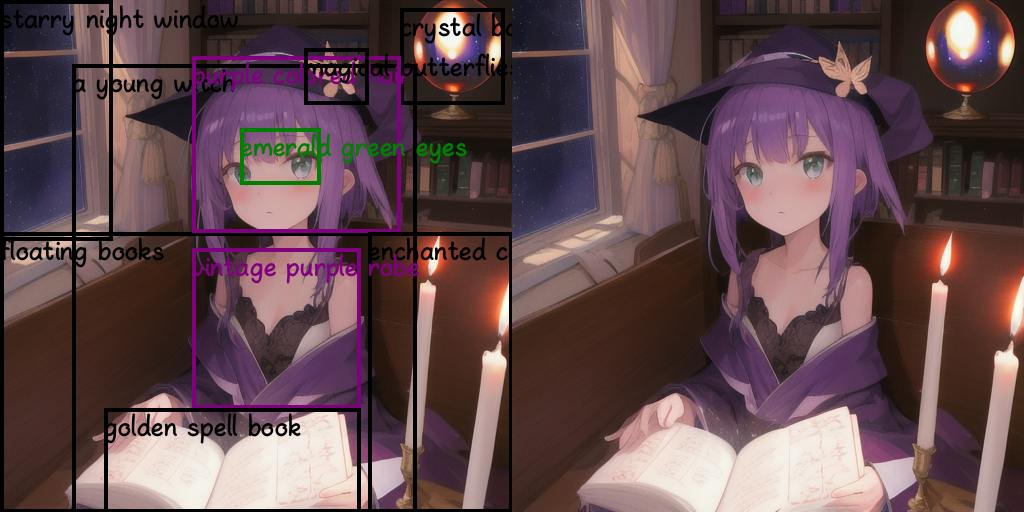

In [ ]:
prompt_final = [[
    # Main quality settings and scene overview
    '''4k, best quality, masterpiece, ultra high res, ultra detailed, a magical library scene,
    a young witch, floating books, starry night window, crystal ball, purple colored hair,
    emerald green eyes, enchanted candlestick, vintage purple robe, golden spell book, magical butterflies''',

    # Individual elements for bounding box layout
    'a young witch',          # Main character box
    'floating books',         # Books placement box
    'starry night window',    # Window placement box
    'crystal ball',           # Crystal ball placement box
    'purple colored hair',    # Hair detail box
    'emerald green eyes',     # Eyes detail box
    'enchanted candlestick',  # Candlestick placement box
    'vintage purple robe',    # Clothing placement box
    'golden spell book',      # Spell book placement box
    'magical butterflies']]   # Butterflies placement box

# Bounding boxes definition
bboxes = [[[
    0.140625, 0.125, 0.8125, 1.0],        # Overall scene boundaries
    [0.0, 0.453125, 1.0, 1.0],            # Witch position in the scene
    [0.0, 0.0, 0.21875, 0.46875],         # Books position in upper left
    [0.78125, 0.015625, 0.984375, 0.203125], # Window position in upper right
    [0.375, 0.109375, 0.78125, 0.453125],    # Crystal ball position
    [0.46875, 0.25, 0.625, 0.359375],        # Hair detail position
    [0.71875, 0.453125, 1.0, 1.0],           # Candlestick position
    [0.375, 0.484375, 0.703125, 0.796875],   # Robe position
    [0.203125, 0.796875, 0.703125, 1.0],     # Spell book position
    [0.59375, 0.09375, 0.71875, 0.203125]]]  # Butterflies position

# Negative prompt to avoid unwanted elements
negative_prompt = '''worst quality, low quality, bad anatomy, watermark, text, blurry,
                    modern elements, technology, contemporary clothing'''

# Set random seed for reproducibility
seed = 123

# Image generation settings
seed_everything(seed)
image = pipe(
    prompt_final,      # Our detailed scene description
    bboxes,           # Layout information
    num_inference_steps=30,  # Number of denoising steps
    guidance_scale=8.0,      # How closely to follow the prompt
    MIGCsteps=15,           # Multi-image generation control steps
    aug_phase_with_and=False, # Augmentation phase setting
    negative_prompt=negative_prompt, # What to avoid
    NaiveFuserSteps=30      # Fusion process steps
).images[0]

# Save and display the output
image.save('output2.png')
image.show()
image = pipe.draw_box_desc(image, bboxes[0], prompt_final[0][1:])
image.save('anno_output2.png')
image.show()

# Display both versions side by side
img_anno = cv2.imread('./anno_output2.png')
img = cv2.imread('./output2.png')
cv2_imshow(np.concatenate([img_anno, img], axis=1))